# Samsung Stock Price Prediction (LSTM Model)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Import data
data = pd.read_csv('./Data/Samsung.csv')

In [3]:
#Show loaded data
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4651.737793,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4248.232422,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4278.686523,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4217.780273,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4392.884766,46880000
...,...,...,...,...,...,...,...
5616,2022-05-17,66600.0,67900.0,66600.0,67600.0,67600.000000,15680447
5617,2022-05-18,68300.0,68700.0,67600.0,68100.0,68100.000000,16486319
5618,2022-05-19,66500.0,67600.0,66500.0,67500.0,67500.000000,17073727
5619,2022-05-20,67800.0,68400.0,67700.0,68000.0,68000.000000,12109671


In [4]:
#Check data info: is null value and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5621 entries, 0 to 5620
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5621 non-null   object 
 1   Open       5621 non-null   float64
 2   High       5621 non-null   float64
 3   Low        5621 non-null   float64
 4   Close      5621 non-null   float64
 5   Adj Close  5621 non-null   float64
 6   Volume     5621 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 307.5+ KB


In [5]:
#Change column "Date" data type from object to datetime and check changes
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5621 entries, 0 to 5620
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5621 non-null   datetime64[ns]
 1   Open       5621 non-null   float64       
 2   High       5621 non-null   float64       
 3   Low        5621 non-null   float64       
 4   Close      5621 non-null   float64       
 5   Adj Close  5621 non-null   float64       
 6   Volume     5621 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 307.5 KB


In [6]:
#Generate descriptive statistics
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,5621,5621.000000,5621.000000,5621.000000,5621.000000,5621.000000,5.621000e+03
mean,2011-01-20 13:39:46.977406208,24884.228785,25135.306885,24627.612524,24879.640633,21729.421164,2.176271e+07
min,2000-01-04 00:00:00,2540.000000,2760.000000,2420.000000,2730.000000,2078.436279,0.000000e+00
25%,2005-05-24 00:00:00,10160.000000,10320.000000,10020.000000,10160.000000,7780.813477,1.179815e+07
50%,2010-12-21 00:00:00,16580.000000,16800.000000,16420.000000,16600.000000,13287.424805,1.774055e+07
75%,2016-08-26 00:00:00,31320.000000,31600.000000,30940.000000,31340.000000,26643.304688,2.722500e+07
max,2022-05-23 00:00:00,90300.000000,96800.000000,89500.000000,91000.000000,88908.179688,1.642150e+08
std,NaN,20108.258909,20274.093474,19934.697294,20094.098853,19740.261271,1.545201e+07


## Data Analysis

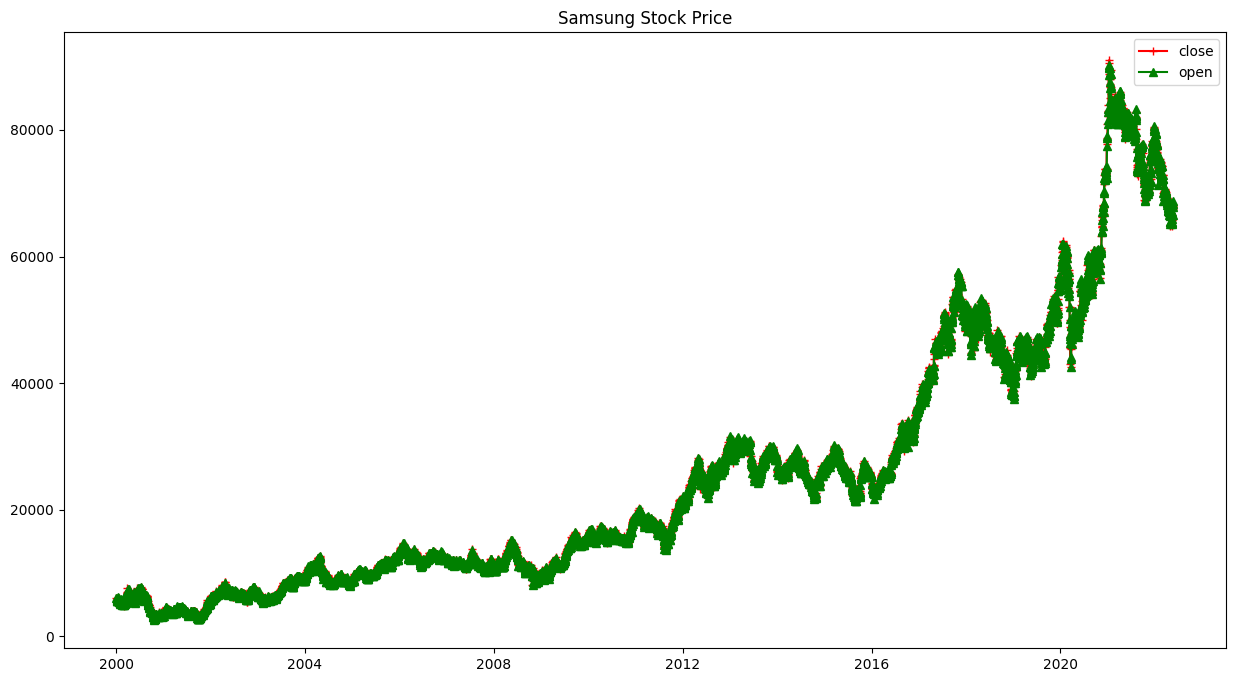

In [7]:
#Visualize the distribution of open and closed Stock prices
plt.figure(figsize=(15,8))
plt.plot(data['Date'], data['Close'], c="r", label="close", marker="+")
plt.plot(data['Date'], data['Open'], c="g", label="open", marker="^")
plt.title('Samsung Stock Price')
plt.legend()
plt.show()

In [8]:
#Create mask for data from 2020-01-01 to 2020-05-23
mask_df = data.loc[(data['Date']>='2020-01-01')] 
mask_df

,Date,Open,High,Low,Close,Adj Close,Volume
5032,2020-01-02,55500.0,56000.0,55000.0,55200.0,51557.589844,12993228
5033,2020-01-03,56000.0,56600.0,54900.0,55500.0,51837.800781,15422255
5034,2020-01-06,54900.0,55600.0,54600.0,55500.0,51837.800781,10278951
5035,2020-01-07,55700.0,56400.0,55600.0,55800.0,52118.007813,10009778
5036,2020-01-08,56200.0,57400.0,55900.0,56800.0,53052.019531,23501171
...,...,...,...,...,...,...,...
5616,2022-05-17,66600.0,67900.0,66600.0,67600.0,67600.000000,15680447
5617,2022-05-18,68300.0,68700.0,67600.0,68100.0,68100.000000,16486319
5618,2022-05-19,66500.0,67600.0,66500.0,67500.0,67500.000000,17073727
5619,2022-05-20,67800.0,68400.0,67700.0,68000.0,68000.000000,12109671


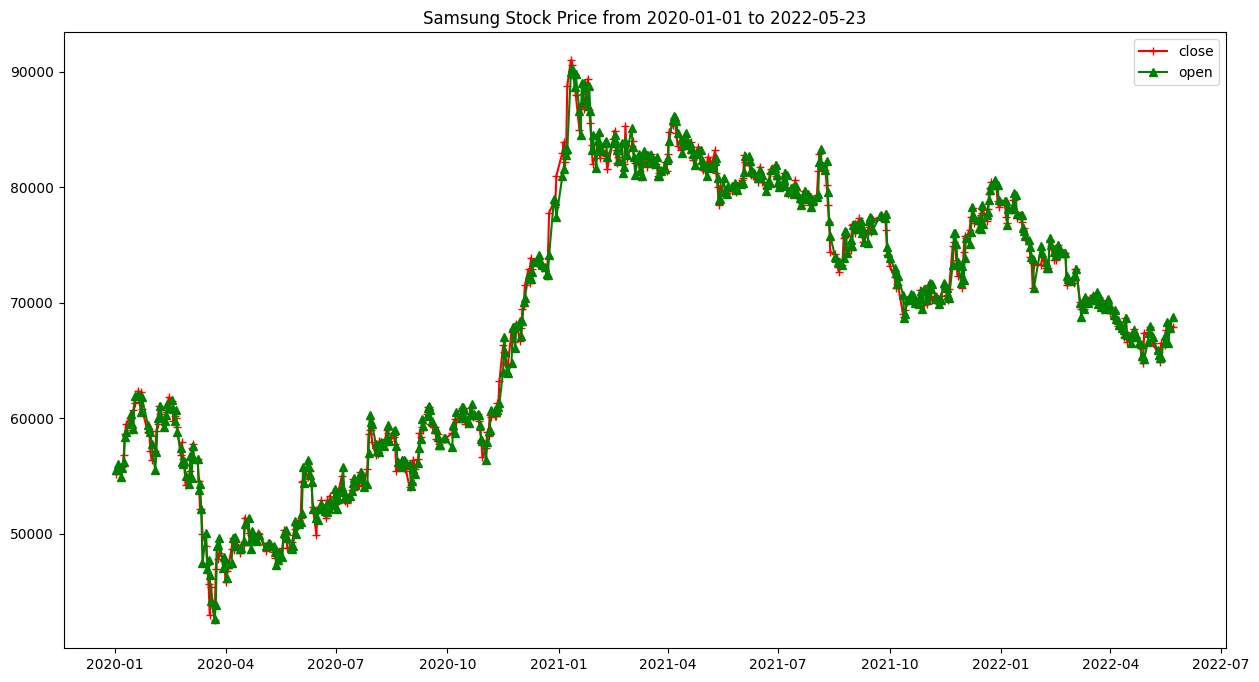

In [9]:
#Visualisation of masked data
plt.figure(figsize=(15,8))
plt.plot(mask_df['Date'], mask_df['Close'], c="r", label="close", marker="+")
plt.plot(mask_df['Date'], mask_df['Open'], c="g", label="open", marker="^")
plt.title('Samsung Stock Price from 2020-01-01 to 2022-05-23')
plt.legend()
plt.show()

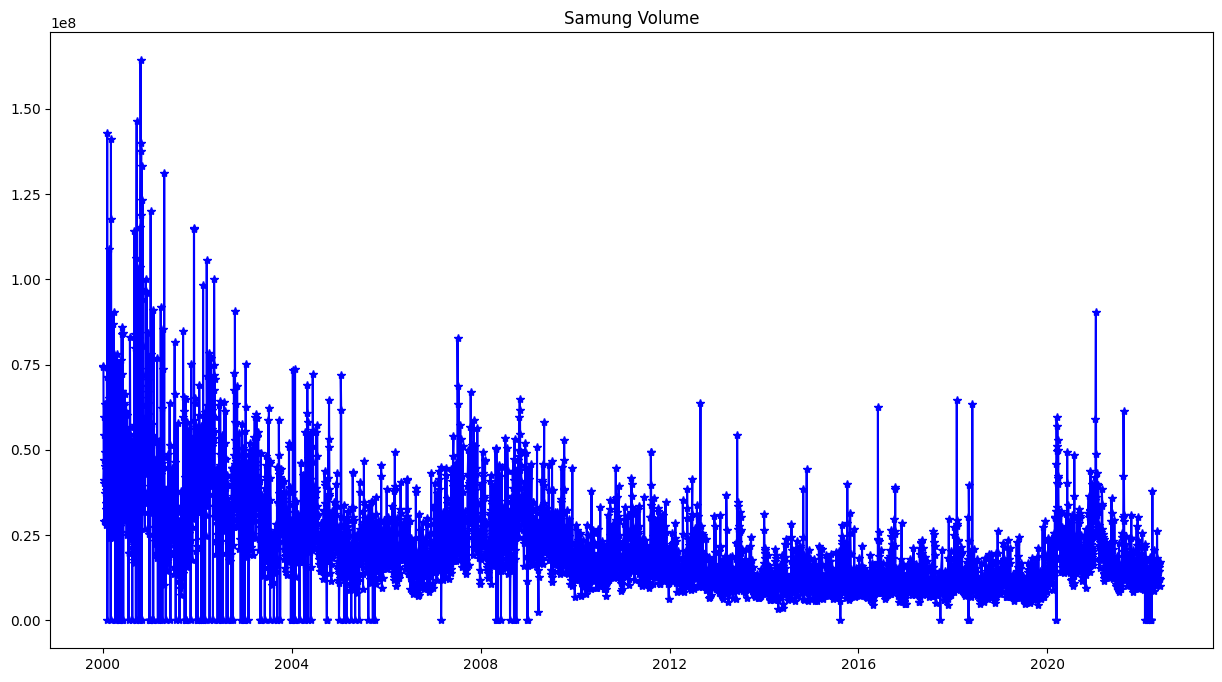

In [10]:
#Plot the volume of trade
plt.figure(figsize=(15,8))
plt.plot(data['Date'], data['Volume'], c='blue', marker='*')
plt.title("Samung Volume")
plt.show()

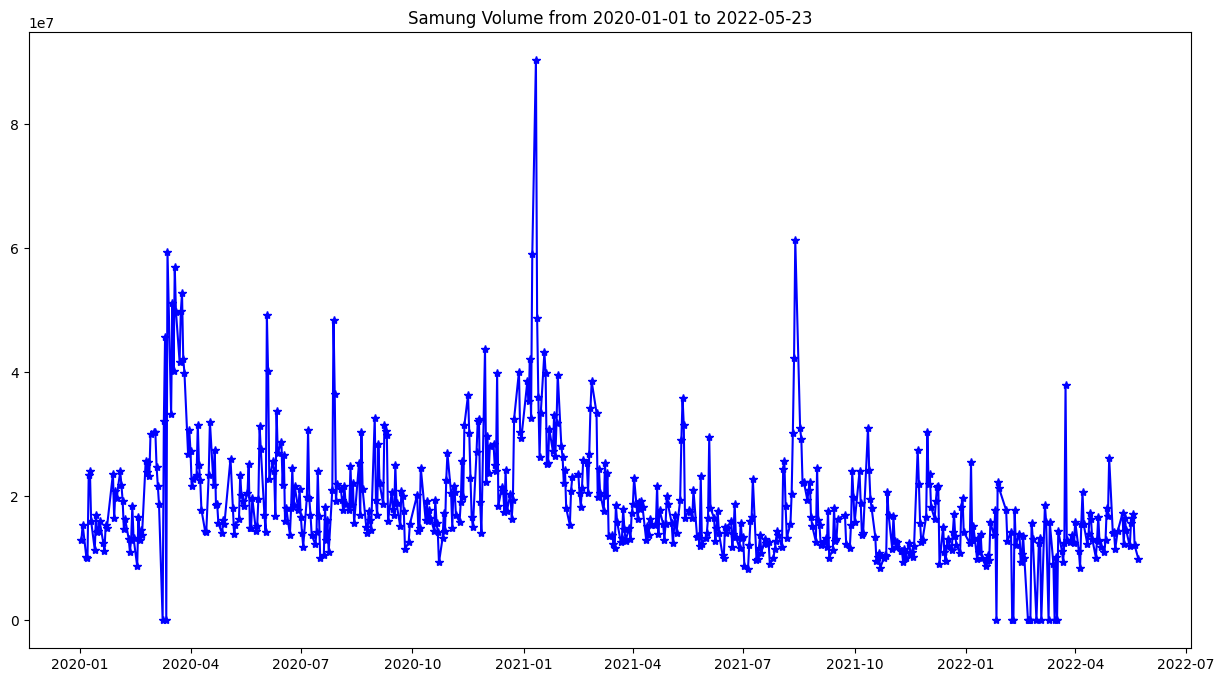

In [11]:
#Plot the volume of trade for maked data
plt.figure(figsize=(15,8))
plt.plot(mask_df['Date'], mask_df['Volume'], c='blue', marker='*')
plt.title("Samung Volume from 2020-01-01 to 2022-05-23")
plt.show()

## Prepare date to train

In [12]:
#Select the "Close" column
close_data = data.filter(['Close'])
#Creation of a dataset instance for the value of the "Close" column
dataset = close_data.values
#Selection of 90% of the training data for the model
training = int(np.ceil(len(dataset)*.90))
print(training)

5059


In [13]:
#Using MinMaxSclaer to transform the function to a range from 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [14]:
#Select train data from scaled data
training_data = scaled_data[0:int(training),:]

In [15]:
x_train = []
y_train = []

In [16]:
#Preparation of training data for the model. Downloading data from the last 60 days before the predicted value to teach the model.
for i in range(60,len(training_data)):
    x_train.append(training_data[i-60:i,0])
    y_train.append(training_data[i,0])

In [17]:
#Change x_train and y_train to array
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
#Reshape x_train
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))

In [19]:
#Check shape of x_train array 
x_train.shape

(4999, 60, 1)

## Model LSTM 

In [20]:
#Build Gated RNN- LSTM network using TensorFlow
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units = 64,
    return_sequences = True,
    input_shape = (x_train.shape[1], 1)))
model.add(tf.keras.layers.LSTM(units = 64))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 52,033
Trainable params: 52,033
Non-trainable params: 0
_________________________________________________________________


In [21]:
#Compile a model 
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error'
)

In [22]:
#Train model
history = model.fit(
    x_train,
    y_train,
    epochs=10
)

Epoch 1/10
157/157 [==============================] - 8s 27ms/step - loss: 0.0038
Epoch 2/10
157/157 [==============================] - 4s 26ms/step - loss: 0.0018
Epoch 3/10
157/157 [==============================] - 4s 26ms/step - loss: 0.0015
Epoch 4/10
157/157 [==============================] - 4s 29ms/step - loss: 0.0012
Epoch 5/10
157/157 [==============================] - 4s 28ms/step - loss: 9.7973e-04
Epoch 6/10
157/157 [==============================] - 4s 27ms/step - loss: 0.0012
Epoch 7/10
157/157 [==============================] - 4s 26ms/step - loss: 9.3356e-04
Epoch 8/10
157/157 [==============================] - 4s 26ms/step - loss: 9.4647e-04
Epoch 9/10
157/157 [==============================] - 4s 26ms/step - loss: 9.3743e-04
Epoch 10/10
157/157 [==============================] - 4s 26ms/step - loss: 8.6257e-04


In [23]:
#Select data to test the model
test_data = scaled_data[training-60:,:]
x_test = []
y_test = dataset[training:,:]

In [24]:
#Preparation of test data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [25]:
#Reshape test data
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

In [26]:
#Predict data
prediction = model.predict(x_test)
#Reversing the transformation
prediction = scaler.inverse_transform(prediction)

18/18 [==============================] - 1s 11ms/step


In [27]:
#Calculate Mean Squared Error and Root Mean Squared Error
mse = np.mean(((prediction - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

MSE 29923609.818878174
RMSE 5470.247692644107


## Visualisation of predictions

In [28]:
#Select for visualisation of training data and actual value for predicted data
train = data[:training]
test = data[training:]
test['Predictions'] = prediction

C:\Users\patry\AppData\Local\Temp\ipykernel_40144\1489802138.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = prediction


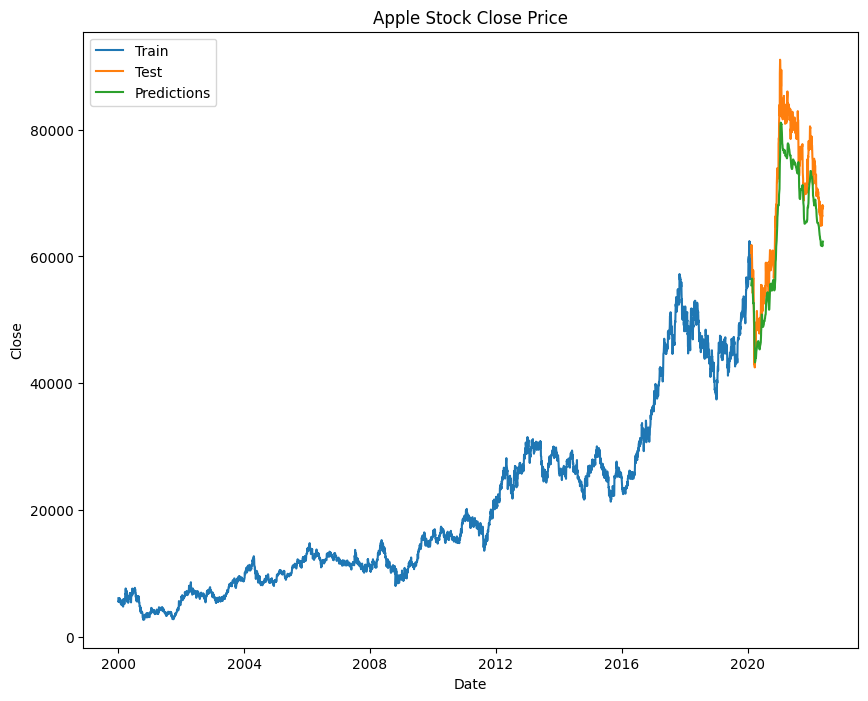

In [29]:
#Visualisation of predictions and actual value for predicted data 
plt.figure(figsize=(10, 8))
plt.plot(train['Date'], train['Close'])
plt.plot(test['Date'], test[['Close', 'Predictions']])
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])
plt.show()